<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week2/week2_%EC%9C%A0%EB%AA%85%ED%99%94%EA%B0%80%ED%99%94%ED%92%8D%EB%A7%8C%EB%93%A4%EA%B8%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유명 화가의 화풍을 따라하는 인공지능 만들기_2
- 반반 나누어서 적용해보기

## 이미지 및 모델 불러오기

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNetFromTorch('models/instance_norm/mosaic.t7')
net2 = cv2.dnn.readNetFromTorch('models/instance_norm/the_scream.t7')

img = cv2.imread('imgs/03.jpg')

## 전처리

In [2]:
h, w, c = img.shape

img = cv2.resize(img, dsize=(500, int(h / w * 500)))

MEAN_VALUE = [103.939, 116.779, 123.680]
blob = cv2.dnn.blobFromImage(img, mean=MEAN_VALUE)

## 첫번째 모델(mosaic)로 추론(forward)하기

In [3]:
net.setInput(blob)
output = net.forward()

output = output.squeeze().transpose((1, 2, 0))

output += MEAN_VALUE
output = np.clip(output, 0, 255)
output = output.astype('uint8')

## 두 번째 모델(the scream)로 추론(forward)하기

In [4]:
net2.setInput(blob)
output2 = net2.forward()

output2 = output2.squeeze().transpose((1, 2, 0))

output2 += MEAN_VALUE
output2 = np.clip(output2, 0, 255)
output2 = output2.astype('uint8')

## 첫 번째 모델(mosaic)와 두 번째 모델(the scream)으로 추론한 이미지 반반 합치기

In [5]:
output = output[:,0:250]
output2 = output2[:,250:500]
output3 = np.concatenate([output,output2], axis=1)

## 이미지 출력하여보기

img


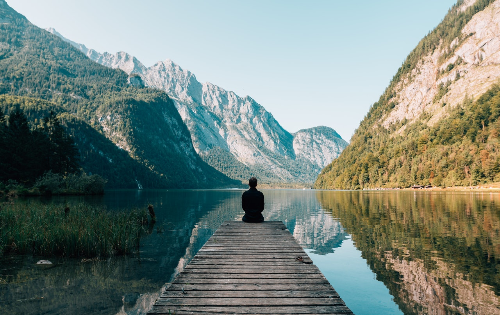

output


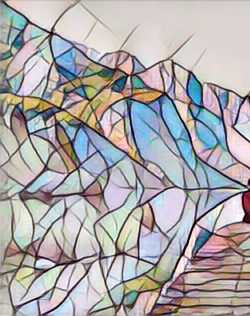

output2


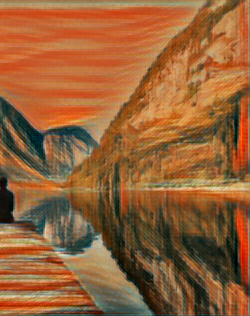

output3


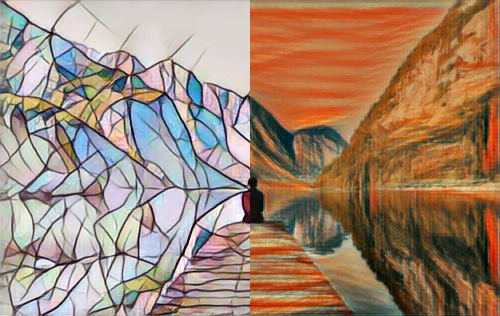

In [6]:
print('img')
cv2_imshow(img)
print('output')
cv2_imshow(output)
print('output2')
cv2_imshow(output2)
print('output3')
cv2_imshow(output3)